In [8]:
import json
import networkx as nx
import os
from rdflib import Graph, URIRef, Literal
from collections import defaultdict, Counter
import pandas as pd


In [2]:
# Initialize an empty graph
G = Graph()

# categories = defaultdict(list)
def get_triples(folder_path):
# Read and parse each JSON file
    triples = []
    for filename in os.listdir(folder_path):
        
        if filename.endswith('.json'):
            file_path = os.path.join(folder_path, filename)
            with open(file_path, 'r') as f:
                data = json.load(f)
                for triple in data:
                    subject = triple['subject']
                    predicate = triple['predicate']
                    object = triple['object']
                    
                    triples.append((subject, predicate, object))
                    # categories[category].append(triple)
                    G.add(subject, object, label=predicate)
    return triples

# print("Loaded and parsed RDF triples from JSON files.")

In [9]:
def get_triples(folder_path):
    triples = []
    g = Graph()

    # Read and parse each JSON file
    for filename in os.listdir(folder_path):
        if filename.endswith('.json'):
            file_path = os.path.join(folder_path, filename)
            with open(file_path, 'r') as f:
                data = json.load(f)
                for triple in data:
                    subject = URIRef(triple['subject'])
                    predicate = URIRef(triple['predicate'])
                    object_value = triple['object']
                    object = URIRef(object_value) if object_value.startswith('http') else Literal(object_value)
        
                    g.add((subject, predicate, object))
                    triples.append((subject, predicate, object))

    return triples


In [10]:
# Computer scientists
folder_path_cs = 'computers_rdf'

# Get triples from the specified folder
triples = get_triples(folder_path_cs)

# Extract properties, predicates, subjects, and objects from triples
properties_cs = [p for s, p, o in triples]
subject_cs = [s for s, p, o in triples]
object_cs = [o for s, p, o in triples]

# Create a DataFrame
rdf_sculptor = pd.DataFrame({
    'subject': subject_cs,
    'predicate': properties_cs,  # Use properties_cs directly here
    'object': object_cs,
    'category': 'computer_scientists'
})

# Save DataFrame to CSV
rdf_sculptor.to_csv('rdf_cs.csv', index=False)

# Display the first few rows of the DataFrame
print(rdf_sculptor.head())

# Count the occurrences of each property
property_counts_cs = Counter(properties_cs)

# Get the top 50 most common properties
top_50_properties_cs = property_counts_cs.most_common(50)
print(top_50_properties_cs)

                                          subject  \
0  http://dbpedia.org/resource/Anthony_James_Barr   
1  http://dbpedia.org/resource/Anthony_James_Barr   
2  http://dbpedia.org/resource/Anthony_James_Barr   
3  http://dbpedia.org/resource/Anthony_James_Barr   
4  http://dbpedia.org/resource/Anthony_James_Barr   

                                      predicate  \
0  http://dbpedia.org/ontology/wikiPageWikiLink   
1  http://dbpedia.org/ontology/wikiPageWikiLink   
2  http://dbpedia.org/ontology/wikiPageWikiLink   
3  http://dbpedia.org/ontology/wikiPageWikiLink   
4  http://dbpedia.org/ontology/wikiPageWikiLink   

                                              object             category  
0             http://dbpedia.org/resource/Calculator  computer_scientists  
1        http://dbpedia.org/resource/Carl_Sassenrath  computer_scientists  
2  http://dbpedia.org/resource/Carroll_Morgan_(co...  computer_scientists  
3  http://dbpedia.org/resource/Cascading_Style_Sh...  computer_scienti

In [11]:
# Sculptors
folder_path_sculptors = 'sculptors_rdf'
triples = get_triples(folder_path_sculptors)
properties_sculptors = [p for s, p, o in triples]
predicates_sculptors = [p for s, p, o in triples]
subjects_sculptors = [s for s, p, o in triples]
objects_sculptors = [o for s, p, o in triples]
rdf_sculptor = pd.DataFrame({'subject': subjects_sculptors, 'predicate': predicates_sculptors, 'object': objects_sculptors, 'category': 'sculptor'})
rdf_sculptor.to_csv('rdf_sculptor.csv', index=False)


property_counts_sculptors = Counter(properties_sculptors)
top_50_properties_sculptors = property_counts_sculptors.most_common(50)
print(top_50_properties_sculptors)

[(rdflib.term.URIRef('http://dbpedia.org/ontology/wikiPageWikiLink'), 9134), (rdflib.term.URIRef('http://dbpedia.org/ontology/wikiPageRedirects'), 7), (rdflib.term.URIRef('http://xmlns.com/foaf/0.1/primaryTopic'), 4)]


In [17]:
import seaborn as sns
import pandas as pd

In [14]:
from matplotlib import pyplot as plt

In [18]:
facts_per_graph = []
# facts_per_category = []
facts = []

# Calculate facts per graph
def plots(path):
    for filename in os.listdir(path):
        if filename.endswith(".json"):
            file_path = os.path.join(path, filename)
            with open(file_path, 'r') as file:
                data = json.load(file)
                num_facts = len(data)  

                # category = data['category']
                facts.append((data, num_facts))
     # Convert to DataFrame 
    df_facts = pd.DataFrame(facts, columns=['property', 'num_facts'])
    # Calculate statistics
    min_facts = df_facts['num_facts'].min()
    max_facts = df_facts['num_facts'].max()
    avg_facts = df_facts['num_facts'].mean()

    print(f"Min facts: {min_facts}")
    print(f"Max facts: {max_facts}")
    print(f"Avg facts: {avg_facts:.2f}")

    # Create histograms
    plt.figure(figsize=(12, 6))
    sns.histplot(df_facts['num_facts'])
    plt.title('Histogram of Number of Facts')
    plt.xlabel('Number of Facts')
    plt.ylabel('Frequency')
    plt.savefig(f'hist_{path}.png')
    plt.show()

    # Create box plots
    plt.figure(figsize=(12, 6))
    sns.boxplot(df_facts['num_facts'])
    plt.title('Box Plot of Number of Facts ')
    plt.xlabel('Category')
    plt.ylabel('Number of Facts')
    plt.xticks(rotation=90)
    plt.savefig(f'box_{path}.png')
    plt.show()
    return df_facts


Min facts: 4
Max facts: 100
Avg facts: 94.30


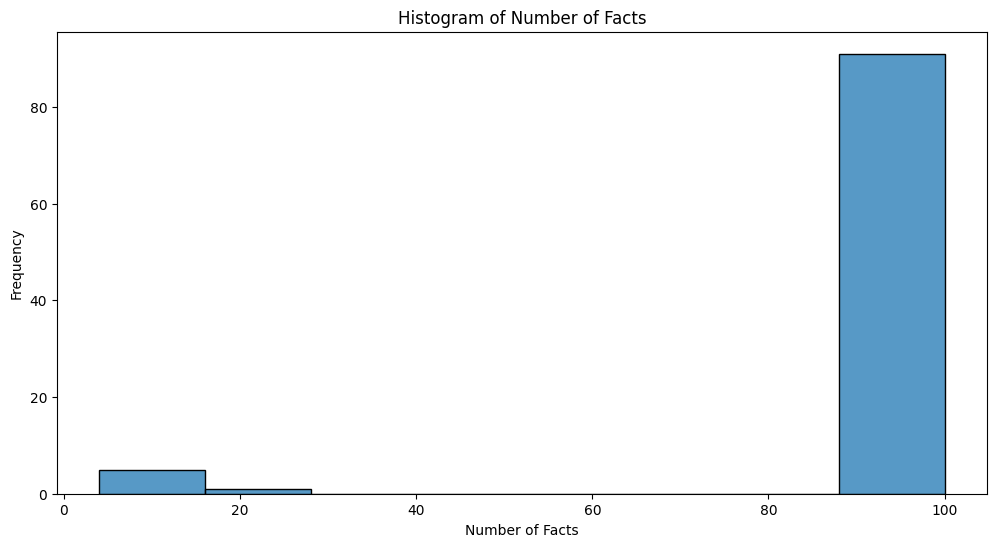

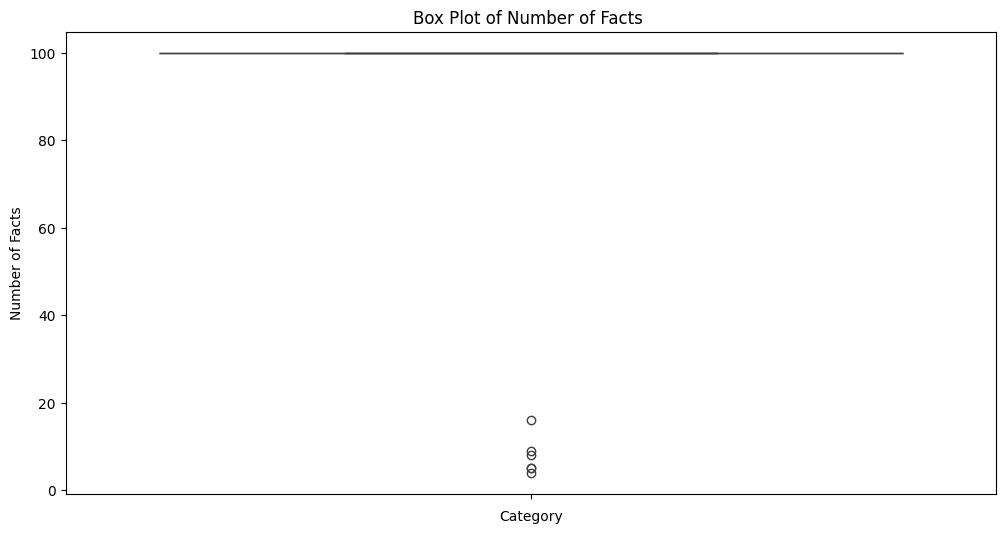

                                             property  num_facts
0   [{'subject': 'http://dbpedia.org/resource/Anth...        100
1   [{'subject': 'http://dbpedia.org/resource/Lenn...        100
2   [{'subject': 'http://dbpedia.org/resource/Andr...          5
3   [{'subject': 'http://dbpedia.org/resource/Trac...        100
4   [{'subject': 'http://dbpedia.org/resource/Rod_...        100
..                                                ...        ...
92  [{'subject': 'http://dbpedia.org/resource/Dani...        100
93  [{'subject': 'http://dbpedia.org/resource/Mart...        100
94  [{'subject': 'http://dbpedia.org/resource/Edmu...        100
95  [{'subject': 'http://dbpedia.org/resource/Greg...        100
96  [{'subject': 'http://dbpedia.org/resource/Jeff...        100

[97 rows x 2 columns]


In [19]:
# Computer scientists
hist_rdf_cs = plots(folder_path_cs)
print(hist_rdf_cs)

Min facts: 4
Max facts: 100
Avg facts: 94.78


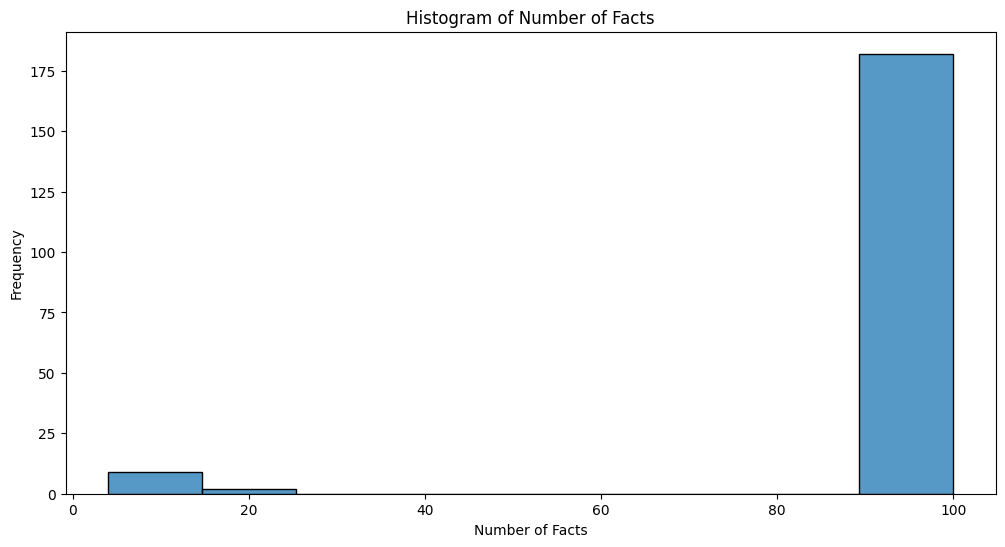

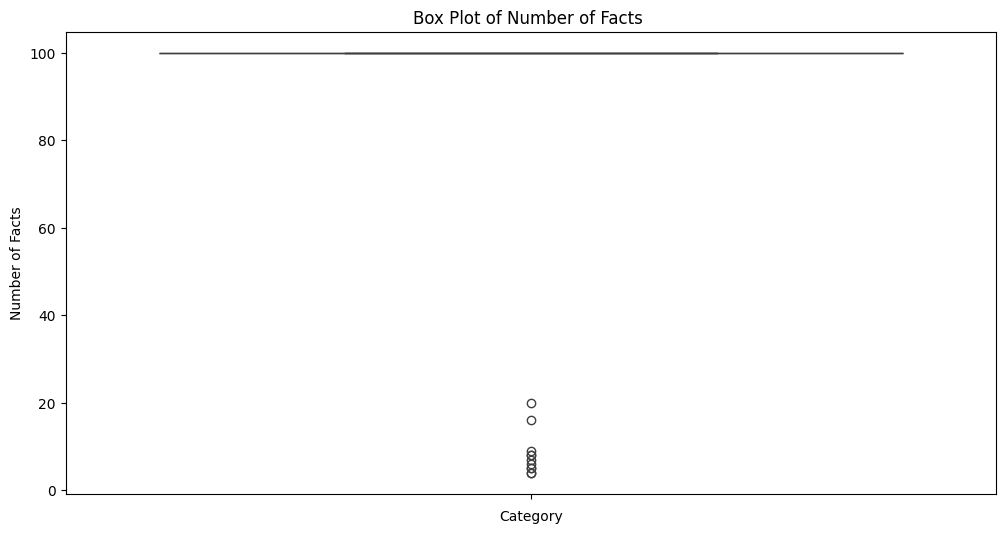

,property,num_facts
0,[{'subject': 'http://dbpedia.org/resource/Anth...,100
1,[{'subject': 'http://dbpedia.org/resource/Lenn...,100
2,[{'subject': 'http://dbpedia.org/resource/Andr...,5
3,[{'subject': 'http://dbpedia.org/resource/Trac...,100
4,[{'subject': 'http://dbpedia.org/resource/Rod_...,100
...,...,...
188,[{'subject': 'http://dbpedia.org/resource/Isa_...,100
189,[{'subject': 'http://dbpedia.org/resource/John...,100
190,[{'subject': 'http://dbpedia.org/resource/Joha...,100
191,[{'subject': 'http://dbpedia.org/resource/Nico...,100


In [20]:
# Sculptors
df_facts_sculptors = plots(folder_path_sculptors)
df_facts_sculptors